# Lowpass Gaussian Filter Kernels
> 0712238 Yan-Tong Lin, for DIP2021spring HW2-2

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from scipy import signal
from scipy import misc

## Original Image (Chessboard)
- use scipy.signal and numpy in this part

(1024, 1024)

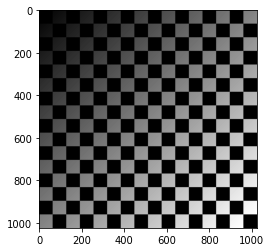

In [3]:
img = Image.open('checkerboard1024-shaded.tif')
plt.imshow(img, cmap=plt.get_cmap('gray'))
np.asarray(img).shape

## Shading Correction with Gaussian Kernel

### Make a Gaussian Kernel with $\sigma=128, 512\times 512$

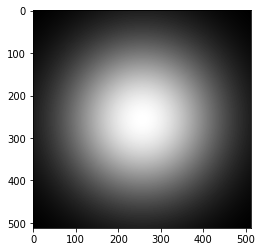

In [4]:
n1= 512
sigma1 = 128 
x, y = np.mgrid[-n1/2:n1/2, -n1/2:n1/2]
kernel1 = np.exp(-(x**2+y**2)/(2*(sigma1**2)))
plt.imshow(kernel1, cmap=plt.get_cmap('gray'))

### Compute the Convolution Directly
- $\text{shade} \approx \text{filter} \star \text{img}$
- this would take a long time $O(n^2 \times N^2)$

In [5]:
shade = signal.convolve2d(img, kernel1, boundary='symm', mode='same') 

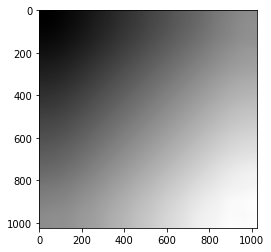

In [6]:
plt.imshow(shade, cmap=plt.get_cmap('gray'))

### Correct the shading
- $\text{img}_\text{corrected} = \text{img} / \text{shade}$

In [7]:
img_corrected = img/shade

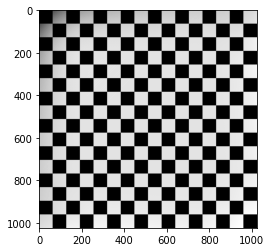

In [8]:
plt.imshow(img_corrected, cmap=plt.get_cmap('gray'))

## Original Image (N1.bmp)
- use opencv in this part

In [9]:
import cv2

(480, 640, 3)

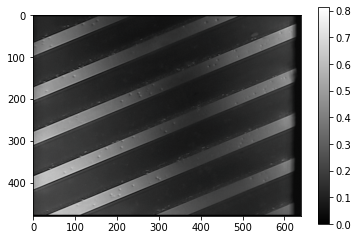

In [10]:
img2 = cv2.imread("N1.bmp")
img2 = img2/255 # normalize to [0,1]
plt.imshow(img2, cmap=plt.get_cmap('gray'))
plt.colorbar()
np.asarray(img2).shape

## Shading Correction with Gaussian Kernel

### Use cv2 for Gaussian Blurring
- $\sigma \approx \text{the width of the pattern}$
- choose appropriate $n (\approx \sigma*3)$ 
- $\text{shade}_2=\text{GaussianFilter}(n,n,\sigma) \star \text{img}_2$

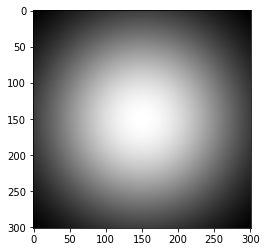

In [11]:
sigma2 = 100 # about the width of the pattern
n2 = 301 # must be odd
kernel2 = cv2.getGaussianKernel(n2, sigma2)
kernel2 = np.outer(kernel2, kernel2)
plt.imshow(kernel2, cmap='gray')

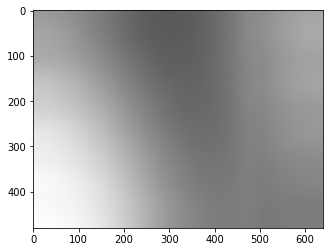

In [12]:
shade2 = cv2.GaussianBlur(img2, (n2, n2), sigma2)
shade2 = cv2.normalize(shade2, shade2, 1.0, 0.0, cv2.NORM_INF, dtype=cv2.CV_32F) # normalize to [0,1]
plt.imshow(shade2, cmap='gray')

### Correct the shading
- $\text{img}_\text{corrected} = \text{img} / \text{shade}$

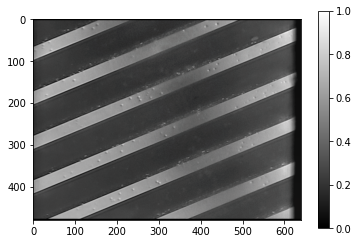

In [13]:
img_corrected_2 = img2/shade2
img_corrected_2 = cv2.normalize(img_corrected_2, img_corrected_2, 1.0, 0.0, cv2.NORM_INF, dtype=cv2.CV_32F) # normalize to [0,1]
plt.imshow(img_corrected_2, cmap='gray')
plt.colorbar()

## Remarks
For image shading correction, the $\sigma$ is chosen to be around the width of the pattern and the kernel size is taken so that the pattern does not appears in the resulting (estimated) shaded pattern noise.

* the first kernel
    * pattern size $\approx \frac{1024}{16} \times 2$
    * $n = 512, \sigma = 128$
* the second kernel
    * pattern size $\approx 100$
    * $n = 301, \sigma = 100$
* The larger $\sigma$ is, the kernel adapts more information from farther pixels, or equivalently, information from each pixel spreads farther.
* The parameter $n$ means the range that we consider the Gaussian Filter effective (since it drops exponentially fast).

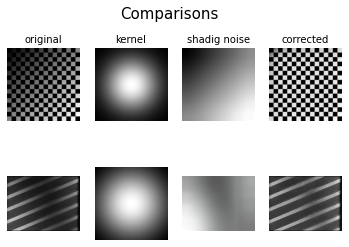

In [15]:
fig, axs = plt.subplots(2, 4)
fig.suptitle("Comparisons", fontsize=15)

collections = [0,0]
collections[0] = [img, kernel1, shade, img_corrected]
collections[1] = [img2, kernel2, shade2, img_corrected_2]
# title
axs[0][0].set_title("original", fontsize=10)
axs[0][1].set_title("kernel", fontsize=10)
axs[0][2].set_title("shadig noise", fontsize=10)
axs[0][3].set_title("corrected", fontsize=10)
## arrangement
for i in range(2):
    for j in range(4):
        axs[i][j].imshow(collections[i][j], cmap='gray')
        axs[i][j].axis('off')